In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
results_dir = Path('./results')

csv_files = [
    'baseline-xa_knowledge.csv',
    'baseline-qu_ctxt_aug.csv',
    'baseline-baseline.csv',
    'baseline-xa_dialog.csv',
    'bart-base-baseline.csv',
    'bart-base-qu_ctxt_aug.csv',
    'bart-base-xa_dialog.csv',
    'bart-base-xa_knowledge.csv',
#     'bart-base-xa_knowledge+qu_ctxt_aug.csv',
    't5-small-baseline.csv',
    't5-small-qu_ctxt_aug.csv',
    't5-small-xa_dialog.csv',
    't5-small-xa_knowledge.csv',
    't5-small-xa_knowledge+qu_ctxt_aug.csv',
]

dfs = []
for csv_file in csv_files:    
#     exp_result = 'results/baseline.csv'
    df = pd.read_csv(str(results_dir / csv_file), sep=',', header=0, index_col=None)
#     df.aggregate(func='mean', axis=0)
    df['exp_id'] = csv_file.split('.')[0]
    dfs.append(df)

# print(dfs[0].columns)
df = pd.concat(dfs, axis=0).reset_index(drop=True)
df

,model_name_or_path,checkpoint_dir,test_file,text_column,summary_column,knowledge_column,batch_size,max_length,do_sample,top_p,...,bleu_k,rouge1_k,meteor_k,bleu_d,rouge1_d,meteor_d,exp_id,context_augmentation_examples,context_code_attention_bias_value,max_context_examples
0,resources/models/ft/bart_small/baseline/,checkpoint-72620,resources/data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,26.382434,0.469324,0.440346,0.006684,0.116606,0.054745,baseline-xa_knowledge,NaN,NaN,NaN
1,resources/models/ft/bart_small/baseline/,checkpoint-72620,resources/data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,26.104899,0.465703,0.437481,0.006581,0.116597,0.054825,baseline-xa_knowledge,NaN,NaN,NaN
2,resources/models/ft/bart_small/baseline/,checkpoint-72620,resources/data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,26.569765,0.470214,0.443160,0.006801,0.116767,0.054893,baseline-xa_knowledge,NaN,NaN,NaN
3,resources/models/ft/bart_small/baseline/,checkpoint-72620,resources/data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,26.311183,0.467633,0.439291,0.006588,0.116489,0.054815,baseline-xa_knowledge,NaN,NaN,NaN
4,resources/models/ft/bart_small/baseline/,checkpoint-72620,resources/data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,26.421568,0.470383,0.442170,0.006623,0.116231,0.054517,baseline-xa_knowledge,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,models/t5-small/,checkpoint-72620,data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,25.931350,0.524394,0.480411,0.005787,0.106250,0.047200,t5-small-xa_knowledge+qu_ctxt_aug,data/Topical-Chat/KGD/contexts/questions.txt,5.0,10.0
61,models/t5-small/,checkpoint-72620,data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,26.359123,0.533853,0.487482,0.005332,0.104205,0.046374,t5-small-xa_knowledge+qu_ctxt_aug,data/Topical-Chat/KGD/contexts/questions.txt,5.0,10.0
62,models/t5-small/,checkpoint-72620,data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,25.322653,0.523139,0.476553,0.004875,0.104052,0.046043,t5-small-xa_knowledge+qu_ctxt_aug,data/Topical-Chat/KGD/contexts/questions.txt,5.0,10.0
63,models/t5-small/,checkpoint-72620,data/Topical-Chat/KGD/test_freq.json,turns,target,knowledge,120,40,True,0.9,...,26.658549,0.535825,0.489730,0.005461,0.104110,0.046260,t5-small-xa_knowledge+qu_ctxt_aug,data/Topical-Chat/KGD/contexts/questions.txt,5.0,10.0


In [3]:
agg_ops = {
#     'uniq': np.mean, 
#     'qc_turn_level': [np.mean, np.std],
    'qc_sent_level': [np.mean, np.std],
    'ppl_mean': [np.mean], 
#     'ppl_std': [np.mean, np.std], 
#     'intra_dist1': [np.mean],
#     'intra_dist2': [np.mean, np.std],
#     'inter_dist1': [np.mean],
#     'inter_dist2': [np.mean, np.std],
    'bleu_t': [np.mean],
#     'rouge1_t': [np.mean, np.std],
#     'meteor_t': [np.mean, np.std],
    'bleu_k': [np.mean],
#     'rouge1_k': [np.mean, np.std],
#     'meteor_k': [np.mean, np.std],
    'bleu_d': [np.mean],
#     'rouge1_d': [np.mean, np.std],
#     'meteor_d': [np.mean, np.std],
}

dfa = df.groupby(['exp_id'], as_index=False).agg(agg_ops)
dfa

exp_id qc_sent_level              ppl_mean  \
                                               mean       std        mean   
0                  bart-base-baseline      0.256856  0.004445   22.960615   
1               bart-base-qu_ctxt_aug      0.330943  0.015033   20.932698   
2                 bart-base-xa_dialog      0.244126  0.003104   20.016863   
3              bart-base-xa_knowledge      0.190910  0.002615   27.999937   
4                   baseline-baseline      0.452554  0.005282   87.263375   
5                baseline-qu_ctxt_aug      0.536327  0.012174   77.365188   
6                  baseline-xa_dialog      0.452157  0.001582   65.656755   
7               baseline-xa_knowledge      0.227270  0.002880  121.423167   
8                   t5-small-baseline      0.273822  0.002045   21.171231   
9                t5-small-qu_ctxt_aug      0.277308  0.004135   20.813220   
10                 t5-small-xa_dialog      0.300894  0.002329   17.704693   
11              t5-small-xa_knowledge      0.113800  0.001932   30.243353   
12  t5-small-xa_knowledge+qu_ctxt_aug      0.117485  0.004000   28.867597   

      bleu_t     bleu_k    bleu_d  
        mean       mean      mean  
0   6.241266  11.096573  0.007413  
1   5.523036   8.404538  0.005463  
2   4.979982   5.471240  0.013738  
3   6.679680  19.007275  0.005120  
4   3.372236  15.605732  0.008942  
5   2.944411  12.007570  0.006601  
6   2.558971   8.828323  0.008007  
7   4.063370  26.357970  0.006655  
8   4.970225  12.594293  0.007125  
9   4.812597  11.938772  0.006719  
10  2.453386   3.033364  0.003133  
11  5.828019  28.649573  0.006830  
12  5.616172  25.905813  0.005306

In [112]:
# dfa['qc_turn_level'].plot.box()
# sns.violinplot(data=dfa, x='qc_turn_level')

[4, 3, 2, 1]


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f14f7c2ab50>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f14f7c2ab80>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f14f7c3beb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f14f7bc7340>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f14f7bc7790>}

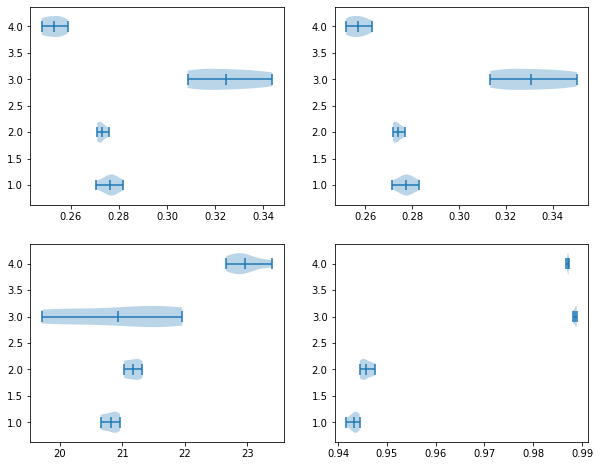

In [118]:
# https://matplotlib.org/stable/gallery/statistics/violinplot.html

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 10))

# base = df[df['exp_id'] == 'bart-base-baseline']['qc_turn_level']
# c = df[df['exp_id'] == 'bart-base-qu_ctxt_aug']['qc_turn_level']
# c = df[df['exp_id'] == 'bart-base-baseline']['qc_turn_level']
# data = df.groupby('exp_id')['qc_turn_level'].plot(type='violin')

axs[0][0].violinplot(
    dataset = [df[df.exp_id == 'bart-base-baseline']["qc_turn_level"].values,
               df[df.exp_id == 'bart-base-qu_ctxt_aug']["qc_turn_level"].values,
               df[df.exp_id == 't5-small-baseline']["qc_turn_level"].values,
               df[df.exp_id == 't5-small-qu_ctxt_aug']["qc_turn_level"].values,
                ],
    positions=[1, 2, 3, 4][::-1],
    points=30, widths=0.4,
    showmeans=True, showextrema=True, showmedians=False,
    vert=False)

axs[0][1].violinplot(
    dataset = [df[df.exp_id == 'bart-base-baseline']["qc_sent_level"].values,
               df[df.exp_id == 'bart-base-qu_ctxt_aug']["qc_sent_level"].values,
               df[df.exp_id == 't5-small-baseline']["qc_sent_level"].values,
               df[df.exp_id == 't5-small-qu_ctxt_aug']["qc_sent_level"].values,
                ],
    positions=[1, 2, 3, 4][::-1],
    points=30, widths=0.4,
    showmeans=True, showextrema=True, showmedians=False,
    vert=False)

axs[1][0].violinplot(
    dataset = [df[df.exp_id == 'bart-base-baseline']["ppl_mean"].values,
               df[df.exp_id == 'bart-base-qu_ctxt_aug']["ppl_mean"].values,
               df[df.exp_id == 't5-small-baseline']["ppl_mean"].values,
               df[df.exp_id == 't5-small-qu_ctxt_aug']["ppl_mean"].values,
                ],
    positions=[1, 2, 3, 4][::-1],
    points=30, widths=0.4,
    showmeans=True, showextrema=True, showmedians=False,
    vert=False)


axs[1][1].violinplot(
    dataset = [df[df.exp_id == 'bart-base-baseline']["intra_dist2"].values,
               df[df.exp_id == 'bart-base-qu_ctxt_aug']["intra_dist2"].values,
               df[df.exp_id == 't5-small-baseline']["intra_dist2"].values,
               df[df.exp_id == 't5-small-qu_ctxt_aug']["intra_dist2"].values,
                ],
    positions=[1, 2, 3, 4][::-1],
    points=30, widths=0.4,
    showmeans=True, showextrema=True, showmedians=False,
    vert=False)



In [81]:

# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]
print(data)
# fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 10))

# axs[0, 0].violinplot(data, pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)
# axs[0, 0].set_title('Custom violinplot 1', fontsize=fs)

# axs[0, 1].violinplot(data, pos, points=40, widths=0.5,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      bw_method='silverman')
# axs[0, 1].set_title('Custom violinplot 2', fontsize=fs)

# axs[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
#                      showextrema=True, showmedians=True, bw_method=0.5)
# axs[0, 2].set_title('Custom violinplot 3', fontsize=fs)

# axs[0, 3].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
#                      showextrema=True, showmedians=True, bw_method=0.5,
#                      quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])
# axs[0, 3].set_title('Custom violinplot 4', fontsize=fs)

# axs[0, 4].violinplot(data[-1:], pos[-1:], points=60, widths=0.7,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
# axs[0, 4].set_title('Custom violinplot 5', fontsize=fs)

# axs[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
#                      showmeans=True, showextrema=True, showmedians=True)
# axs[1, 0].set_title('Custom violinplot 6', fontsize=fs)

# axs[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      bw_method='silverman')
# axs[1, 1].set_title('Custom violinplot 7', fontsize=fs)

# axs[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      bw_method=0.5)
# axs[1, 2].set_title('Custom violinplot 8', fontsize=fs)

# axs[1, 3].violinplot(data, pos, points=200, vert=False, widths=1.1,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]],
#                      bw_method=0.5)
# axs[1, 3].set_title('Custom violinplot 9', fontsize=fs)

# axs[1, 4].violinplot(data[-1:], pos[-1:], points=200, vert=False, widths=1.1,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
# axs[1, 4].set_title('Custom violinplot 10', fontsize=fs)


# for ax in axs.flat:
#     ax.set_yticklabels([])

# fig.suptitle("Violin Plotting Examples")
# fig.subplots_adjust(hspace=0.5)



[array([ 1.14730678,  0.57054479,  0.52352131,  0.13612566, -0.54932369,
        0.36980765, -0.52961496,  0.32788026, -1.04794487, -0.8782936 ,
       -2.10186372,  0.82130015, -1.53771397,  0.62718162, -0.98189006,
        0.6353187 , -0.15046942,  0.1551667 , -0.1422912 , -1.86371654,
       -0.6299222 , -0.89586749, -1.27032892,  1.88451619, -1.47220901,
       -0.85546152, -1.05457034,  1.60270726, -1.42044358, -0.54562322,
       -0.3007555 ,  0.17104193, -0.10722563, -0.46982148,  0.06763052,
        1.15707151,  0.12289598,  0.31852591,  0.89185437,  1.49603801,
        1.12806487,  0.9786698 , -0.13159374, -1.77235763,  0.99652961,
        0.41065211,  1.75190539, -0.64645361,  2.61457867,  0.94116546,
        1.10116798,  1.51199934,  0.20311866,  0.28641729,  0.55430123,
       -0.77746869,  0.28884413, -0.5122649 ,  0.73172557,  1.84724525,
       -1.66747594, -1.24576685,  0.60765084, -0.01767904,  0.66420522,
       -0.50406981,  1.09768727, -1.19719419, -0.39093742, -1.9

In [57]:
ax = sns.violinplot(data, pos, points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
ax = set_title('Custom violinplot 1', fontsize=fs)

/home/cluster/tkew/.conda/envs/unsup_ctrl_2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: unhashable type: 'numpy.ndarray'

In [89]:
x = np.random.poisson(lam =3, size=100)
y = np.random.choice(["S{}".format(i+1) for i in range(6)], size=len(x))
df = pd.DataFrame({"Scenario":y, "LMP":x})
df
# fig, axes = plt.subplots()

# axes.violinplot(dataset = [df[df.Scenario == 'S1']["LMP"].values,
#                            df[df.Scenario == 'S2']["LMP"].values,
#                            df[df.Scenario == 'S3']["LMP"].values,
#                            df[df.Scenario == 'S4']["LMP"].values,
#                            df[df.Scenario == 'S5']["LMP"].values,
#                            df[df.Scenario == 'S6']["LMP"].values ], vert=False)

# axes.set_title('Day Ahead Market')
# axes.yaxis.grid(True)
# axes.set_xlabel('Scenario')
# axes.set_ylabel('LMP ($/MWh)')

,Scenario,LMP
0,S1,4
1,S5,6
2,S1,2
3,S1,3
4,S1,3
...,...,...
95,S6,4
96,S1,2
97,S1,3
98,S2,0
